In [1]:
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath

In [2]:
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# Variables
FERTILIZER_LOCATION = get_directory('./dataset/fertilizer')
TRAIN_SPLIT = 0.8
INPUT_HEADERS = ['temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange', 'label']

In [4]:
INPUT_HEADERS

['temperature',
 'humidity',
 'ph',
 'rainfall',
 'is_maize',
 'is_grape',
 'is_apple',
 'is_orange',
 'label']

In [5]:
_fert = pd.read_excel(get_directory(FERTILIZER_LOCATION + '/Fertiliser Prediction.xlsx'))

In [6]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [7]:
_fert.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
#_fert['label'] = pd.Categorical(_fert['label'])
#_fert['label'] = _fert.label.cat.codes

In [9]:
# Sanity check - now Label should be gone, replaced by one-hot encodings
_fert

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
...,...,...,...,...,...,...,...,...
395,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
396,13,8,12,25.162966,92.547360,7.105905,114.311720,orange
397,6,7,7,27.681673,94.473169,7.199106,113.999515,orange
398,40,17,15,21.350934,90.949297,7.871063,107.086209,orange


In [10]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [11]:
_fert_N = _fert[['N', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()
_fert_P = _fert[['P', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()
_fert_K = _fert[['K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].copy()

In [12]:
# Labelling representation of each data
_fert_N.loc[:, 'target_output'] = 'N'
_fert_P.loc[:, 'target_output'] = 'P'
_fert_K.loc[:, 'target_output'] = 'K'

_fert_N.rename(columns = {'N': 'output'}, inplace=True)
_fert_P.rename(columns = {'P': 'output'}, inplace=True)
_fert_K.rename(columns = {'K': 'output'}, inplace=True)

In [13]:
# Sanity check
_fert_N

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,maize,N
1,61,26.100184,71.574769,6.931757,102.266244,maize,N
2,80,23.558821,71.593514,6.657965,66.719955,maize,N
3,73,19.972160,57.682729,6.596061,60.651715,maize,N
4,61,18.478913,62.695039,5.970458,65.438354,maize,N
...,...,...,...,...,...,...,...
395,27,32.717485,90.546083,7.656978,113.328978,orange,N
396,13,25.162966,92.547360,7.105905,114.311720,orange,N
397,6,27.681673,94.473169,7.199106,113.999515,orange,N
398,40,21.350934,90.949297,7.871063,107.086209,orange,N


In [14]:
_fert_K

,output,temperature,humidity,ph,rainfall,label,target_output
0,16,22.613600,63.690706,5.749914,87.759539,maize,K
1,17,26.100184,71.574769,6.931757,102.266244,maize,K
2,16,23.558821,71.593514,6.657965,66.719955,maize,K
3,21,19.972160,57.682729,6.596061,60.651715,maize,K
4,20,18.478913,62.695039,5.970458,65.438354,maize,K
...,...,...,...,...,...,...,...
395,5,32.717485,90.546083,7.656978,113.328978,orange,K
396,12,25.162966,92.547360,7.105905,114.311720,orange,K
397,7,27.681673,94.473169,7.199106,113.999515,orange,K
398,15,21.350934,90.949297,7.871063,107.086209,orange,K


In [15]:
FERTILISER = _fert_N.copy()
FERTILISER = FERTILISER.append(
    _fert_P, 
    ignore_index=True).append(
        _fert_K,
        ignore_index=True
    )

FERTILISER

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,maize,N
1,61,26.100184,71.574769,6.931757,102.266244,maize,N
2,80,23.558821,71.593514,6.657965,66.719955,maize,N
3,73,19.972160,57.682729,6.596061,60.651715,maize,N
4,61,18.478913,62.695039,5.970458,65.438354,maize,N
...,...,...,...,...,...,...,...
1195,5,32.717485,90.546083,7.656978,113.328978,orange,K
1196,12,25.162966,92.547360,7.105905,114.311720,orange,K
1197,7,27.681673,94.473169,7.199106,113.999515,orange,K
1198,15,21.350934,90.949297,7.871063,107.086209,orange,K


In [16]:
# Data to see before deciding on normalisation: max values
FERTILISER.describe()

,output,temperature,humidity,ph,rainfall
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,75.238333,22.908862,82.867767,6.304437,94.377141
std,70.161186,6.253690,11.493721,0.588955,20.189610
min,0.000000,8.825675,55.282204,5.510925,60.651715
25%,17.000000,19.723364,78.719580,5.839879,71.424148
50%,39.000000,22.705257,86.994867,6.206827,102.626226
75%,135.000000,25.190546,92.049560,6.552920,111.777102
max,205.000000,41.948657,94.964199,7.995849,124.983162


In [17]:
FERTILISER.reset_index().drop('index', axis=1)

,output,temperature,humidity,ph,rainfall,label,target_output
0,71,22.613600,63.690706,5.749914,87.759539,maize,N
1,61,26.100184,71.574769,6.931757,102.266244,maize,N
2,80,23.558821,71.593514,6.657965,66.719955,maize,N
3,73,19.972160,57.682729,6.596061,60.651715,maize,N
4,61,18.478913,62.695039,5.970458,65.438354,maize,N
...,...,...,...,...,...,...,...
1195,5,32.717485,90.546083,7.656978,113.328978,orange,K
1196,12,25.162966,92.547360,7.105905,114.311720,orange,K
1197,7,27.681673,94.473169,7.199106,113.999515,orange,K
1198,15,21.350934,90.949297,7.871063,107.086209,orange,K


In [18]:
len(FERTILISER)

1200

In [19]:
# manually normalise
#FERTILISER.loc[:, 'output'] = FERTILISER['output'] / 205
#FERTILISER.loc[:, 'temperature'] = FERTILISER['temperature'] / 42
#FERTILISER.loc[:, 'humidity'] = FERTILISER['humidity'] / 95
#FERTILISER.loc[:, 'ph'] = FERTILISER['ph'] / 8
#FERTILISER.loc[:, 'rainfall'] = FERTILISER['rainfall'] / 125

In [20]:
FERTILISER = FERTILISER.sample(frac=1).reset_index().drop('index', axis=1)

FERTILISER_TRAIN = FERTILISER.loc[:int(len(FERTILISER) * TRAIN_SPLIT)].reset_index().drop('index', axis=1)
FERTILISER_TEST = FERTILISER.loc[int(len(FERTILISER) * TRAIN_SPLIT):].reset_index().drop('index', axis=1)

FERTILISER_TRAIN_FEATURES = FERTILISER_TRAIN.copy()
FERTILISER_TEST_FEATURES = FERTILISER_TEST.copy()

FERTILISER_TRAIN_LABEL = FERTILISER_TRAIN_FEATURES.pop('output')
FERTILISER_TEST_LABEL = FERTILISER_TEST_FEATURES.pop('output')

In [21]:
# Check if they're balanced or not
FERTILISER_TRAIN

,output,temperature,humidity,ph,rainfall,label,target_output
0,9,17.249446,91.137728,6.543192,112.509052,orange,K
1,40,24.536101,91.909972,6.488221,115.978799,orange,N
2,4,15.632110,94.259662,7.561143,101.470570,orange,N
3,17,26.100184,71.574769,6.931757,102.266244,maize,K
4,14,11.503229,94.893318,6.946355,115.568378,orange,P
...,...,...,...,...,...,...,...
956,199,23.996862,91.610017,5.824779,117.610292,apple,K
957,50,18.147101,71.094453,5.573286,88.077537,maize,P
958,200,38.060995,82.247296,6.234904,65.701482,grapes,K
959,196,27.027661,83.170939,5.833302,70.956660,grapes,K


In [22]:
FERTILISER_TEST

,output,temperature,humidity,ph,rainfall,label,target_output
0,195,23.640830,90.952579,5.560521,116.743132,apple,K
1,36,26.549864,72.891873,5.787268,73.336361,maize,P
2,7,16.762017,82.003356,5.662140,73.287128,grapes,N
3,203,21.170892,90.237302,5.895319,123.649515,apple,K
4,25,25.974824,69.363857,6.822587,103.223421,maize,K
...,...,...,...,...,...,...,...
235,16,21.776893,57.808406,6.158831,102.086169,maize,K
236,144,23.849401,94.348150,6.133221,114.051249,apple,P
237,60,24.921622,66.786274,5.750255,109.216228,maize,P
238,4,29.937076,81.777135,5.898944,65.522793,grapes,N


In [23]:
import seaborn as sns
#sns.pairplot(FERTILISER_TRAIN)

In [24]:
import tensorflow as tf
#fertiliser_train = df_to_dataset(FERTILISER_TRAIN)
#fertiliser_test = df_to_dataset(FERTILISER_TEST)
#dataset = dataset.shuffle(len(_fert)).batch(1)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [25]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('output')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [26]:
# Create a tf.Dataset
train_dataset = df_to_dataset(FERTILISER_TRAIN, shuffle=True)
test_dataset = df_to_dataset(FERTILISER_TEST, shuffle=True)

In [27]:
for feat, targ in train_dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: {'temperature': <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([19.3642553 , 25.51939719, 17.82803682, 21.72484506, 18.4269936 ,
       41.36106301, 23.71059131, 26.54986394, 24.53610067, 17.66545409,
       22.20700989, 22.35548159, 18.66116213, 33.1056981 , 22.44075021,
       28.2620488 , 16.39624284, 23.99686172, 22.86006627, 23.98289638,
       21.53574127, 26.16985907, 22.76643029, 25.34217103, 21.70416965,
       23.81995682, 30.7280404 , 41.20733624, 19.33516809, 22.63946441,
       15.63211033, 22.98208095])>, 'humidity': <tf.Tensor: shape=(32,), dtype=float64, numpy=
array([83.36094029, 83.98351748, 80.96093443, 92.83975602, 80.55625868,
       82.79782954, 93.27392415, 72.89187265, 91.90997228, 91.69865887,
       93.50574163, 94.47811755, 61.55327249, 93.48447453, 92.70785115,
       91.98317355, 92.18151927, 91.61001707, 93.12859895, 91.5473145 ,
       71.50905983, 71.96246617, 92.12438519, 63.31801994, 93.44006288,
       80.12211649, 82.42614055, 81.6105

In [28]:
# Feature layer
feature_columns = []

for i in ['temperature', 'humidity', 'ph', 'rainfall']:
    feature_columns.append(tf.feature_column.numeric_column(i))

for i in ['label', 'target_output']:
    categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(
        i, FERTILISER[i].unique())
    indicator_column = tf.feature_column.indicator_column(categorical_column)
    feature_columns.append(indicator_column)


In [29]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [30]:
# Define model
predict_fert = tf.keras.Sequential([
#    normaliser,
    feature_layer,
#    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, 0), input_shape=[11]),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])

#predict_fert.summary()

In [32]:
predict_fert.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MSE,
    metrics = ['acc']
)

hist = predict_fert.fit(
    train_dataset,
    validation_data=test_dataset,
    #fertiliser,
    epochs = 50,
#    callbacks = [lr_schedule]
 )

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
26/31 [========================>.....] - ETA: 0s - loss: 912.6668 - acc: 0.0026WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'temperature': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'humidity': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'ph': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'rainfall': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'label': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'target_output': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=string>}
Consider rewriting this model with the Functional API.
31/31 [==============================] - 1s 12ms/step - loss: 878.5811 - acc: 0.0031 - val_loss: 518.6957 - val_acc: 0.0042
Epoch 2/100
31/31 [==============================] - 0s 6ms/step 

In [33]:
predict_fert.predict(np.expand_dims(
    FERTILISER_TEST_FEATURES.loc[0].values,
    0
    ))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).

In [50]:
predict_fert.predict(np.expand_dims(
    FERTILISER_TEST_FEATURES.loc[237].values,
    0
    ))

array([[0.]], dtype=float32)

In [44]:
predict_fert.predict(np.expand_dims(FERTILISER_TEST_FEATURES.loc[238].values, 0))

array([[[0.]]], dtype=float32)

In [45]:
FERTILISER_TEST_FEATURES.loc[237]

temperature    0.659087
humidity       0.994454
ph             0.899888
rainfall       0.911996
is_maize       0.000000
is_grape       0.000000
is_apple       0.000000
is_orange      1.000000
needs_N        0.000000
needs_P        0.000000
needs_K        1.000000
Name: 237, dtype: float64

In [104]:
FERTILISER_TEST

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange,needs_N,needs_P,needs_K
0,203,33.342145,82.510346,5.693287,70.680986,0,1,0,0,0,0,1
1,201,23.819957,80.122116,6.002996,67.273986,0,1,0,0,0,0,1
2,196,40.660123,81.249960,6.372960,74.030301,0,1,0,0,0,0,1
3,205,11.827682,80.282719,5.510925,74.102251,0,1,0,0,0,0,1
4,195,13.285043,83.541938,5.699453,65.800060,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,5,32.717485,90.546083,7.656978,113.328978,0,0,0,1,0,0,1
236,12,25.162966,92.547360,7.105905,114.311720,0,0,0,1,0,0,1
237,7,27.681673,94.473169,7.199106,113.999515,0,0,0,1,0,0,1
238,15,21.350934,90.949297,7.871063,107.086209,0,0,0,1,0,0,1


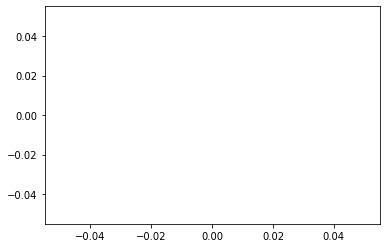

In [29]:
from matplotlib import pyplot as plt

plt.plot(range(len(hist.history['loss'])), hist.history['loss'])
plt.show()

In [28]:
hist.history

{'loss': [0.18927262723445892,
  0.18918836116790771,
  0.18909336626529694,
  0.18898619711399078,
  0.18886560201644897,
  0.1887301355600357,
  0.18857775628566742,
  0.18840639293193817,
  0.18821386992931366,
  0.18799704313278198,
  0.18775340914726257,
  0.1874794214963913,
  0.18717160820960999,
  0.18682576715946198,
  0.18643787503242493,
  0.186003178358078,
  0.18551622331142426,
  0.18497122824192047,
  0.18436217308044434,
  0.18368224799633026,
  0.18292470276355743,
  0.18208079040050507,
  0.18114130198955536,
  0.18009795248508453,
  0.17894195020198822,
  0.177662193775177,
  0.1762455701828003,
  0.17468033730983734,
  0.17295479774475098,
  0.17105832695960999,
  0.1689797341823578,
  0.16670994460582733,
  0.16423088312149048,
  0.16153258085250854,
  0.15860743820667267,
  0.15545153617858887,
  0.1520637571811676,
  0.14844059944152832,
  0.14458300173282623,
  0.1405075639486313,
  0.13623777031898499,
  0.13180546462535858,
  0.12724371254444122,
  0.122578263